In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook',ticks=True, grid=False)
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(r'dataset/hr-analytic.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# Feature Explanation

    enrollee_id : Unique ID for candidate
    city: City code
    city_ development _index : Developement index of the city (scaled)
    gender: Gender of candidate
    relevent_experience: Relevant experience of candidate
    enrolled_university: Type of University course enrolled if any
    education_level: Education level of candidate
    major_discipline :Education major discipline of candidate
    experience: Candidate total experience in years
    company_size: No of employees in current employer's company
    company_type : Type of current employer
    lastnewjob: Difference in years between previous job and current job
    training_hours: training hours completed
    target: 0 – Not looking for job change, 1 – Looking for a job change

# Checking for NaN Values

In [28]:
round(df.isna().sum()/len(df)*100, 2)

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    23.53
relevent_experience        0.00
enrolled_university        2.01
education_level            2.40
major_discipline          14.68
experience                 0.34
company_size              30.99
company_type              32.05
last_new_job               2.21
training_hours             0.00
target                     0.00
dtype: float64

In [29]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

The amount of NaN Values in Company size and Company type Columns is too high and I was planning on dropping it BUT according to some theory :
    
    Theoretically, 25 to 30% is the missing values range to be considered for imputation, beyond 
    which we might want to drop the variable from analysis.
    
    If the information contained in the variable is significant , we can consider imputation 
    upto 50% missing values.
    
    If the missing values are 90% which is way to high for imputation but is still important, 
    you can look for additional information for imputation. Some techniques that can be useful 
    are identifying relevant datasets to derive missing values.
    
But this is job changing we are talking about, though company size usually isn't the main reason people change job (I never heard of a reason where people change job because there's too many people, but company type is (Some people prefer working in Startups after a long time working Public Sector and so on). 

And so, because there's a "Other" variables in company_type(I will do the same for the other columns that contains NaNs and happen to be a categorical column), I will be replacing all of the NaNs with that. As for company_size, I will drop it.

In [30]:
df.drop(['company_size'], axis = 1, inplace = True)

In [31]:
df[['gender','company_type','enrolled_university','education_level','major_discipline']]

,gender,company_type,enrolled_university,education_level,major_discipline
0,Male,NaN,no_enrollment,Graduate,STEM
1,Male,Pvt Ltd,no_enrollment,Graduate,STEM
2,NaN,NaN,Full time course,Graduate,STEM
3,NaN,Pvt Ltd,NaN,Graduate,Business Degree
4,Male,Funded Startup,no_enrollment,Masters,STEM
...,...,...,...,...,...
19153,Male,NaN,no_enrollment,Graduate,Humanities
19154,Male,NaN,no_enrollment,Graduate,STEM
19155,Male,Pvt Ltd,no_enrollment,Graduate,STEM
19156,Male,Pvt Ltd,no_enrollment,High School,NaN


In [32]:
df[['gender','company_type','enrolled_university','education_level','major_discipline']] = df[['gender','company_type','enrolled_university','education_level','major_discipline']].replace(np.nan, 'Other')

As for "experience" and "last new job", I will fill it with Mode

In [8]:
df['experience'] = df['experience'].replace(np.nan, '>20')

In [34]:
df['last_new_job'] = df['last_new_job'].replace(np.nan, '1')

In [12]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

I found an article : https://www.thebalancecareers.com/how-often-do-people-change-jobs-2060467, where they did some research on kinds of things that might affect ones decision on changing jobs and those are : 

    Job Changes by Gender
        Remarkably, the BLS survey revealed that women held almost as many jobs as men 
        throughout their careers, despite taking more time out of their careers for child-rearing 
        activities. On average, men held 12.5 jobs, and women held 12.1 jobs.
        
    Job Changes by Age
        A worker's age impacted the number of jobs that they held in any period. 
        Workers held an average of 5.7 jobs during the six-year period when they 
        were 18 to 24 years old. However, the number of jobs held declined with age.

        Workers had an average of 4.5 jobs when they were 25 to 34 years old, and 2.9 jobs 
        when they were 35 to 44 years old. During the most established phase of many workers' 
        careers, ages 45 to 52, they held only an average of 1.9 jobs.
        
    Job Changes by Race
        From age 18 to age 24, Whites made more job changes than Blacks or Latinos. 
        Whites held 5.9 jobs between the ages of 18 and 24, while Blacks held 4.8 jobs, 
        and Latinos held 5.1 jobs.

        There were only minor differences in later age ranges among the different groups. 
        Whites, Blacks, and Latinos held between 4.3 and 4.6 jobs from age 25 to age 34, 
        and between 2.9 and 3.1 jobs from age 35 to age 44. From age 45 to age 52, 
        all three groups held an average of 1.9 jobs.1
        
    Average Duration of Jobs
        The BLS Employee Tenure Summary notes that a high percentage of younger 
        workers had short-duration jobs as of January 2018. Among jobs held by workers 
        ages 25 to 34, the median tenure is 2.8 years.

        From ages 35 to 44, the median job duration was 4.9 years, and from 45 to 54, 
        the median tenure at a job was 7.6 years. Median tenure rose to 10.1 years 
        for workers aged 55 to 64.

        The job sectors with the highest median tenure include management, engineering, 
        legal, and education. Workers in service occupations had the lowest median tenure.
        
Reasons for Changing Jobs
Some examples of the common reasons that workers change jobs include:

    Seeking higher pay
    Better benefits and perks
    Relocation to a different geographic area
    Career advancement
    Choosing a less stressful job
    Escaping an incompetent or negative boss
    Changing career focus
    Better work-life balance
    Reorganization at their company
    Layoff due to duplication of their job resulting from a merger or acquisition
    More interesting work
    Better work schedule
    Skills and abilities didn't fit the job
    Lack of recognition for accomplishments
    Outsourcing of job function
    Company moved to a new location
    Better alignment between personal values and organizational priorities

# Gender

In [36]:
df['gender'].value_counts()

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

In [92]:
change_by_gender = pd.DataFrame(df[df['target'] == 1][['gender']].value_counts()).reset_index().rename(columns = {0 : 'Change'}).set_index('gender')
change_by_gender

,Change
gender,
Male,3012
Other,1439
Female,326


In [93]:
stay_by_gender = pd.DataFrame(df[df['target'] == 0][['gender']].value_counts()).reset_index().rename(columns = {0 : 'Stay'}).set_index('gender')
change_by_gender
stay_by_gender

,Stay
gender,
Male,10209
Other,3260
Female,912


In [117]:
comparion_by_gender = pd.concat([change_by_gender, stay_by_gender], axis = 1)

In [118]:
comparion_by_gender = comparion_by_gender.T
comparion_by_gender

gender,Male,Other,Female
Change,3012,1439,326
Stay,10209,3260,912


In [119]:
comparion_by_gender['Male']/comparion_by_gender['Male'].sum() * 100

Change    22.781938
Stay      77.218062
Name: Male, dtype: float64

In [121]:
comparion_by_gender['Other']/comparion_by_gender['Other'].sum() * 100

Change    30.623537
Stay      69.376463
Name: Other, dtype: float64

In [120]:
comparion_by_gender['Female']/comparion_by_gender['Female'].sum() * 100

Change    26.332795
Stay      73.667205
Name: Female, dtype: float64

According to data, ignoring the other aside, Females are prone to changing job than males eventhough the difference isn't that much, just by around 4% difference

<AxesSubplot:xlabel='gender', ylabel='count'>

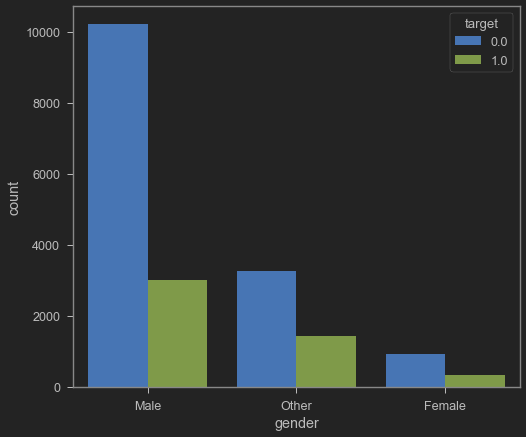

In [132]:
sns.countplot(x = df['gender'], hue = df['target'])

# Experience 

    Experience might play a major role when it comes to deciding wether they will change job or not, 
    because it is related with age

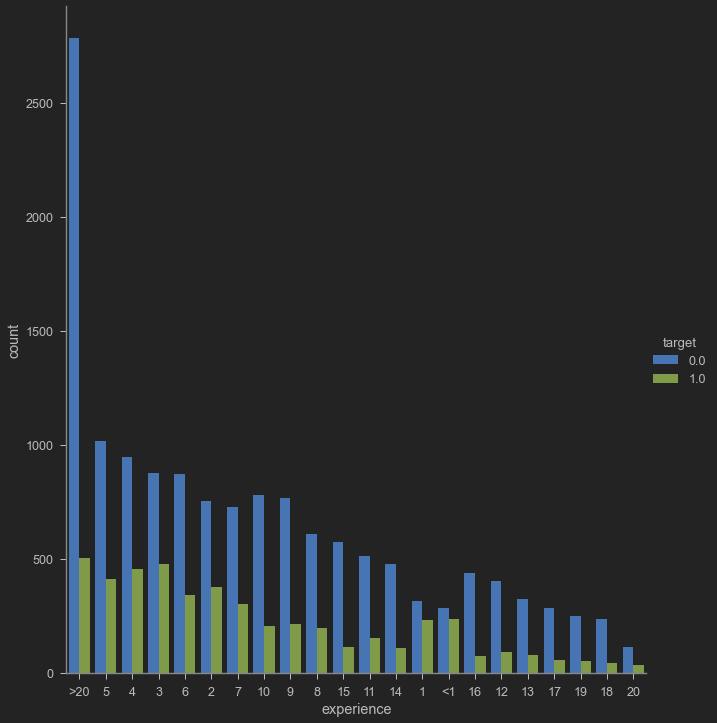

In [198]:
testing = sns.catplot(x="experience", hue = 'target',
                data=df, kind="count",
                height=10, aspect=.9, order = df['experience'].value_counts().index)

From this graph, we can see the difference between who stays and who intend to change job looking by experience. People who has 1 or less experience, tends to change jobs more than people who has more than 1 year experience.  So as their experience increases, the less they want to change their jobs (might be because of age)